In [1]:
import warnings
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRFRegressor
warnings.filterwarnings ( 'ignore' )
from sklearn.pipeline import Pipeline
pd.set_option ( "display.max_columns" , None )

In [2]:
DF = pd.read_csv ( "LAPTOP_DATA.csv" )
DF

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


## Statistik Analisis

In [3]:
DF_Stats_Numeric = DF.describe ( )
DF_Stats_Numeric

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [4]:
DF_Stats_Non_Numeric = DF.describe ( exclude = np.number )
DF_Stats_Non_Numeric

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


In [5]:
DF.info ( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
DF.drop ( columns = [ 'Unnamed: 0' ] , inplace = True )
DF

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


## ANALISIS DATA 

In [7]:
DF [ 'TouchScreen' ] = DF.ScreenResolution.apply ( lambda x : 1 if 'Touchscreen' in x else 0 )
DF [ 'HD_4K' ] = DF.ScreenResolution.apply ( lambda x : 1 if '4K' in x or 'HD' in x or 'HD+' in x else 0 )
DF [ 'CPU_Types' ] = DF.Cpu.apply ( lambda x : 'Samsung' if 'Samsung' in x else ( 'Intel' if 'Intel' in x else ( 'AMD' if 'AMD' in x else 'Intel' ) ) )
DF [ 'Memory_Types' ] = DF.Memory.apply ( lambda x : 'Flash Storage' if 'Flash Storage' in x else ( 'HDD' if 'HDD' in x else ( 'SSD' ) ) )
DF [ 'GPU_Types' ] = DF.Gpu.apply ( lambda x : 'AMD' if 'AMD' in x else ( 'Nvidia' if 'Nvidia' in x else ( 'Intel' ) ) )
DF [ 'CPU_Frequency' ] = DF.Cpu.str.extract (  r'(\d+GHz)' , expand = True )[0].str.replace ( 'GHz' , '' ).astype ( 'int64' )

In [8]:
DF_Original = DF
DF = DF_Original.iloc [ : , [ 0 , 1 , 2 , 5 , 8 , 9 , 10 , 11 , 12 , 13 , 14] ]
Pixels = DF_Original.ScreenResolution.str.extract ( r'(\d+x\d+)', expand = True  )[0].str.replace ( 'x' , ' ' ).tolist()
Pixels = list( map( lambda x : [ int ( x [ 0 ] ), int( x [ 1 ] ) ], [ i.split ( ) for i in Pixels ] ) )
DF [ 'Length' ] = [ x [ 0 ] for x in Pixels ]
DF [ 'Width' ] = [ x [ 1 ] for x in Pixels ]
DF [ 'PPI' ] = np.sqrt ( DF.Length ** 2 + DF.Width ** 2 ) / DF.Inches

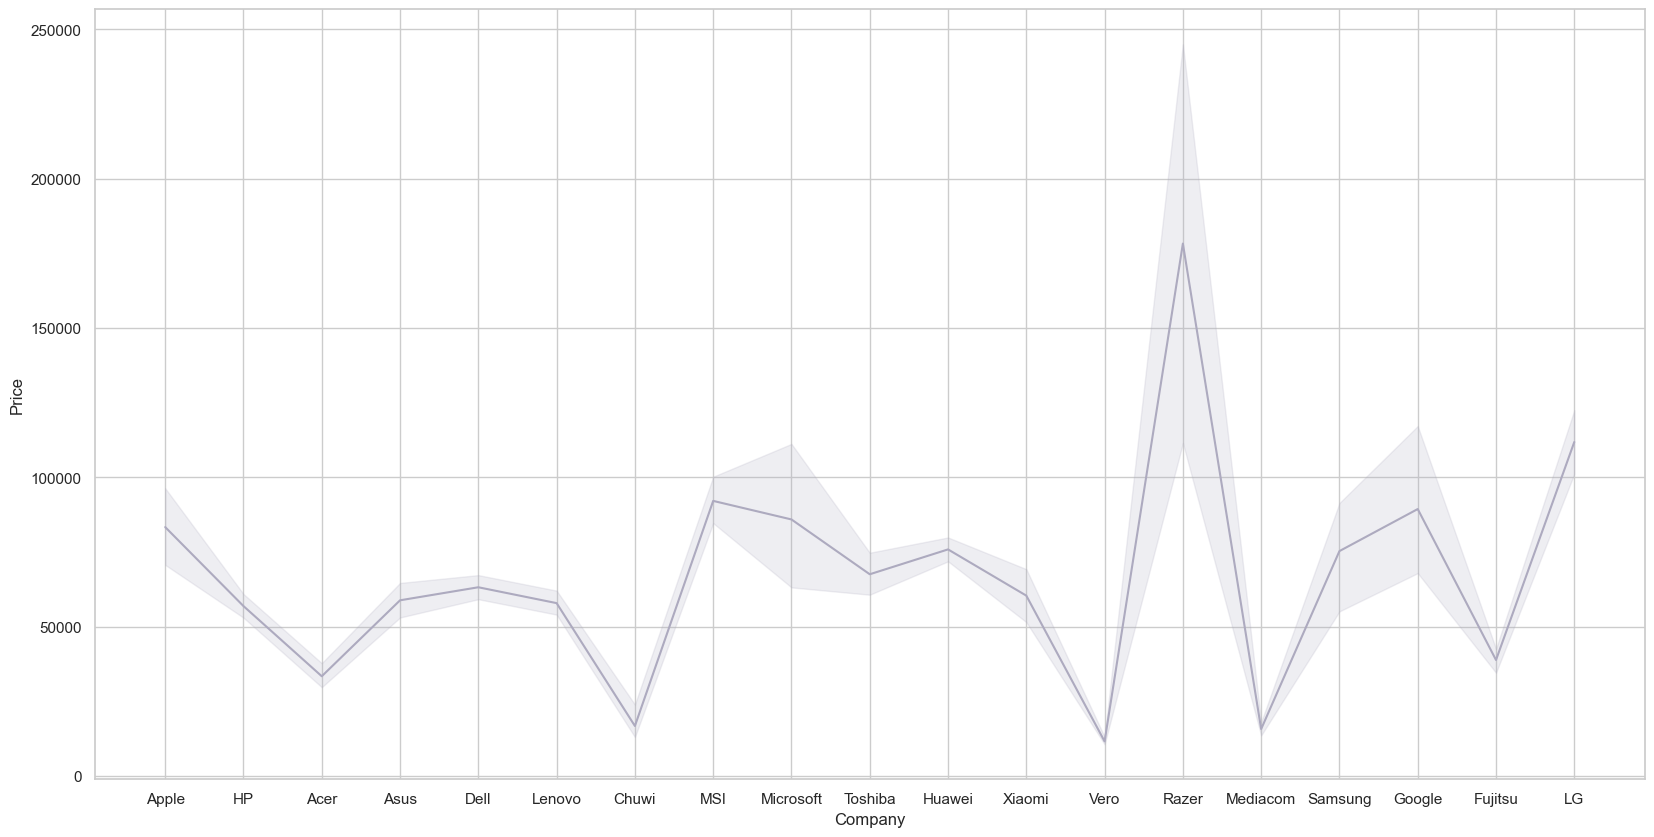

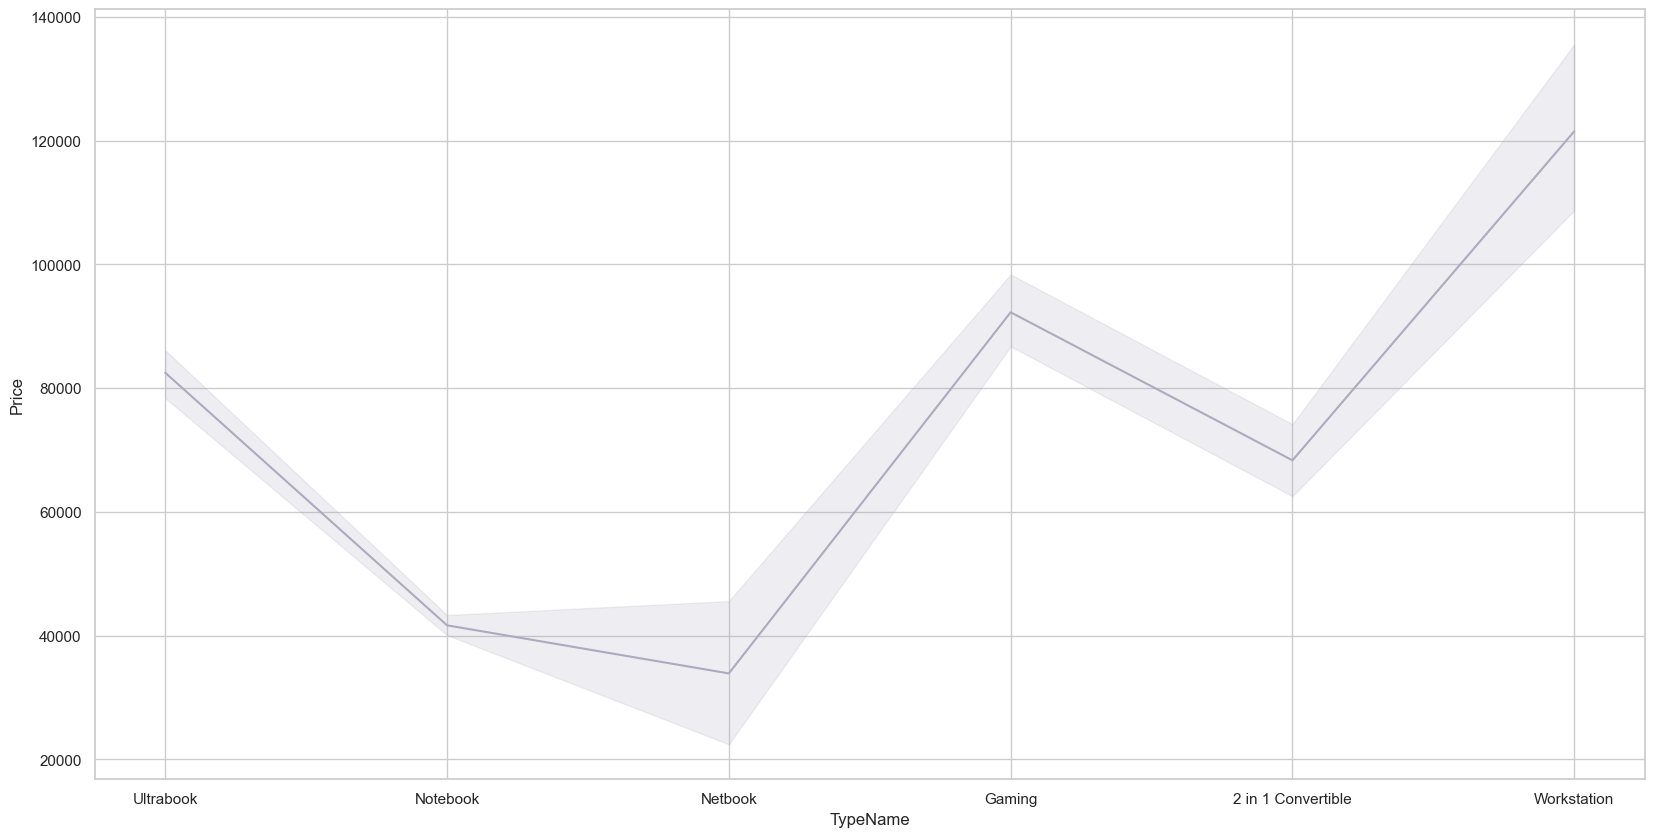

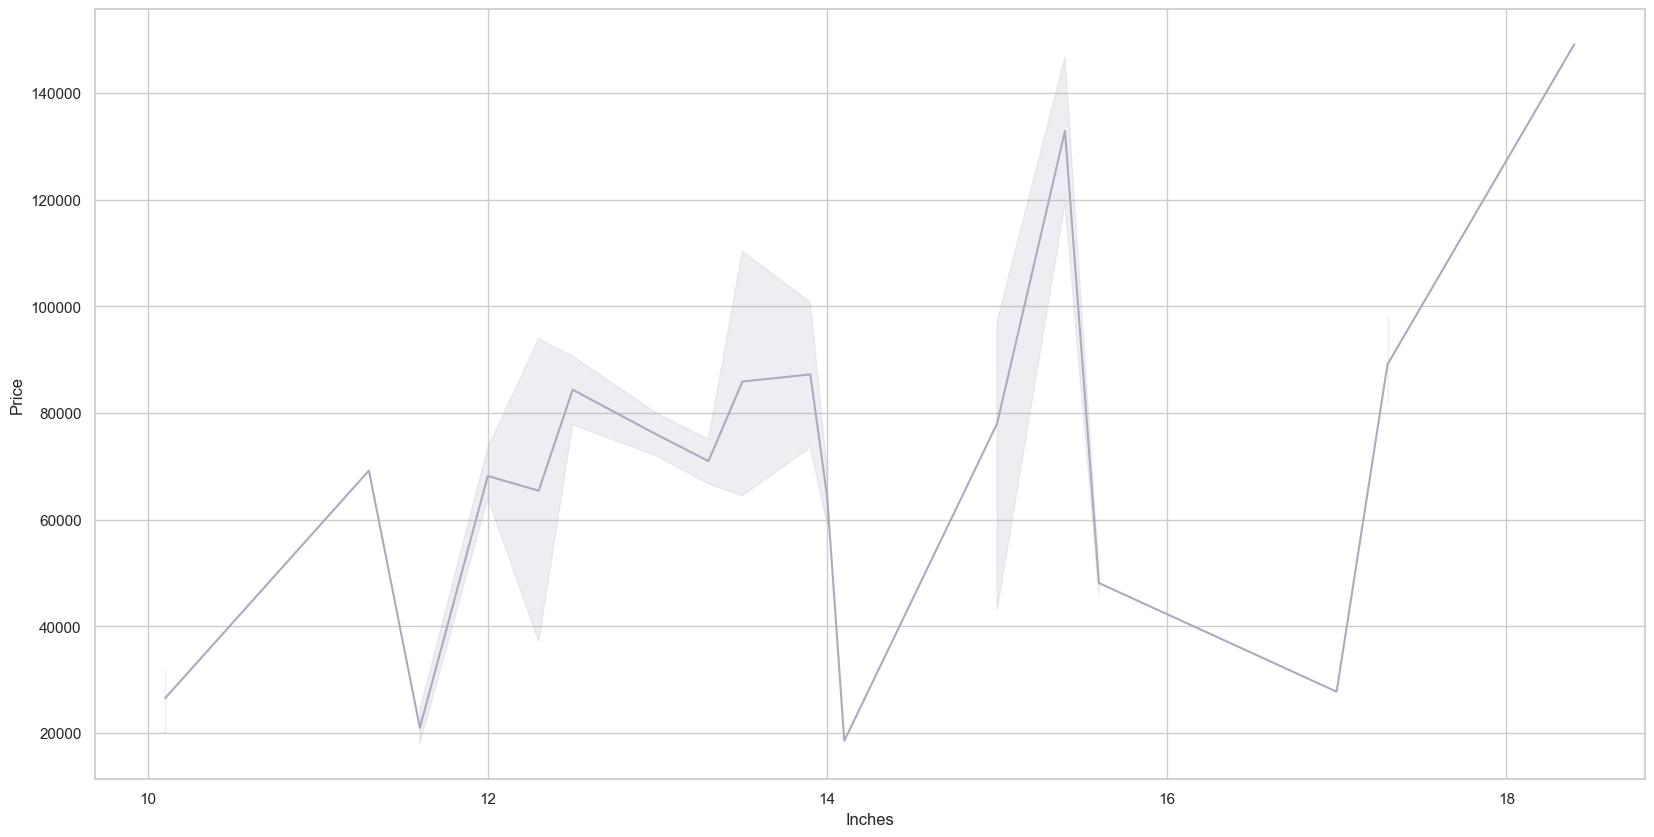

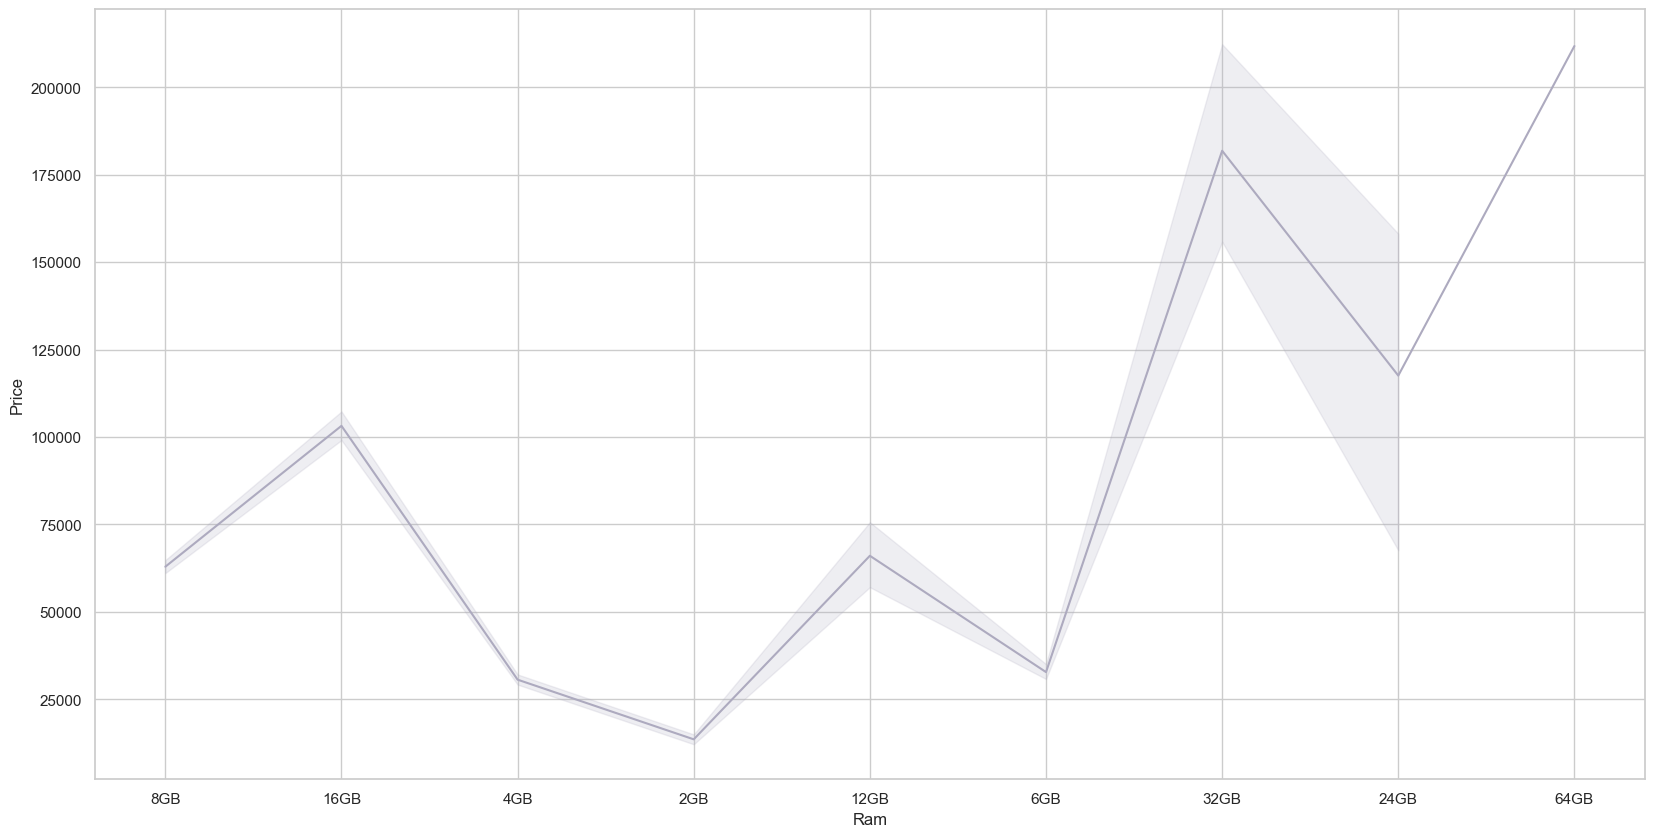

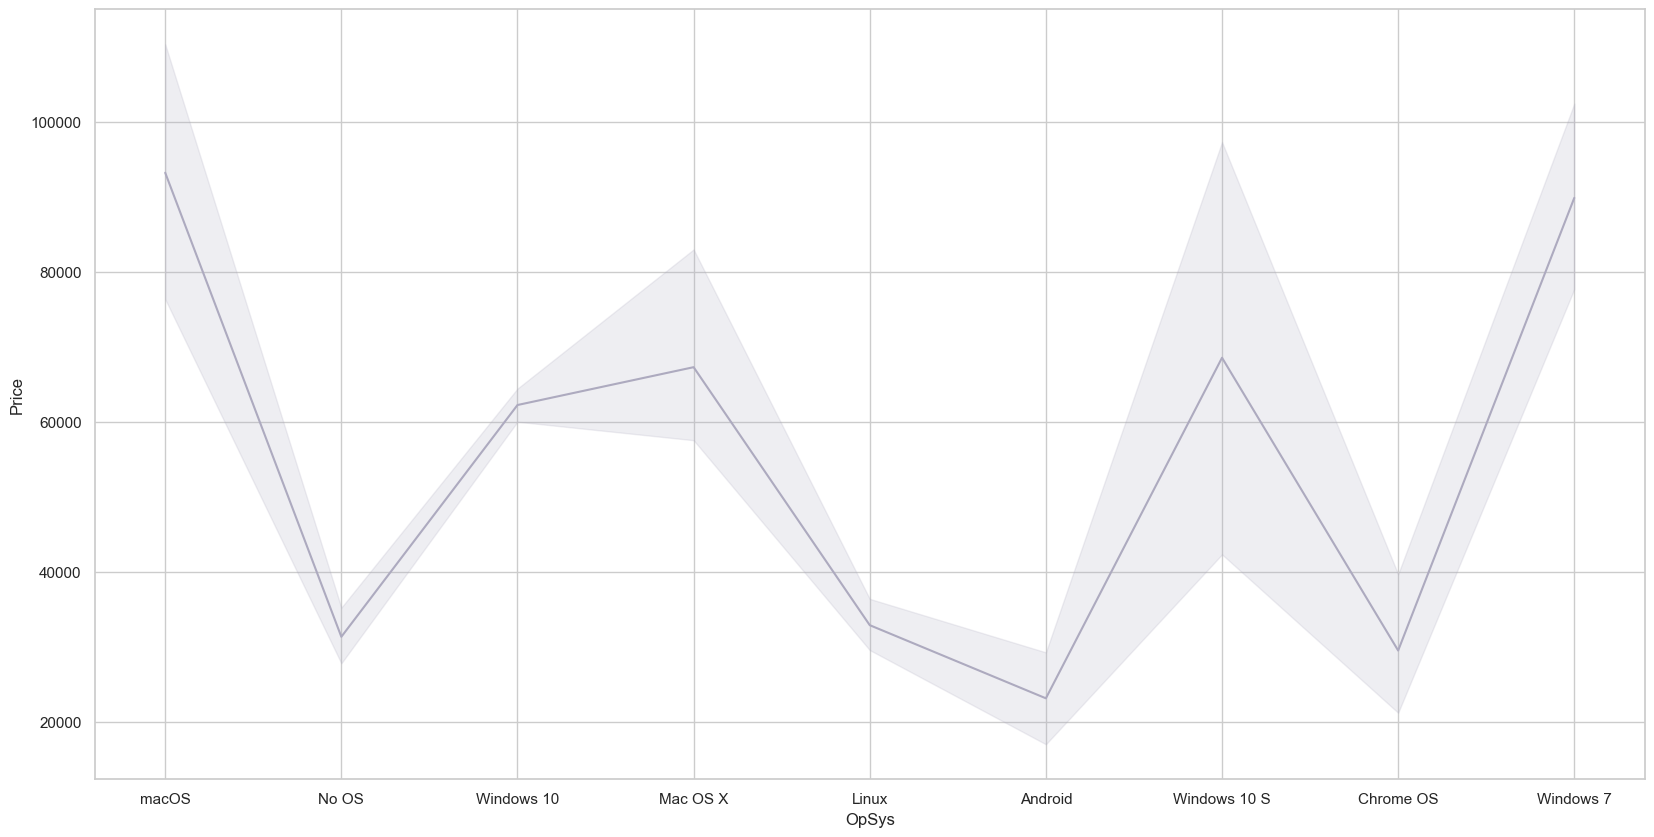

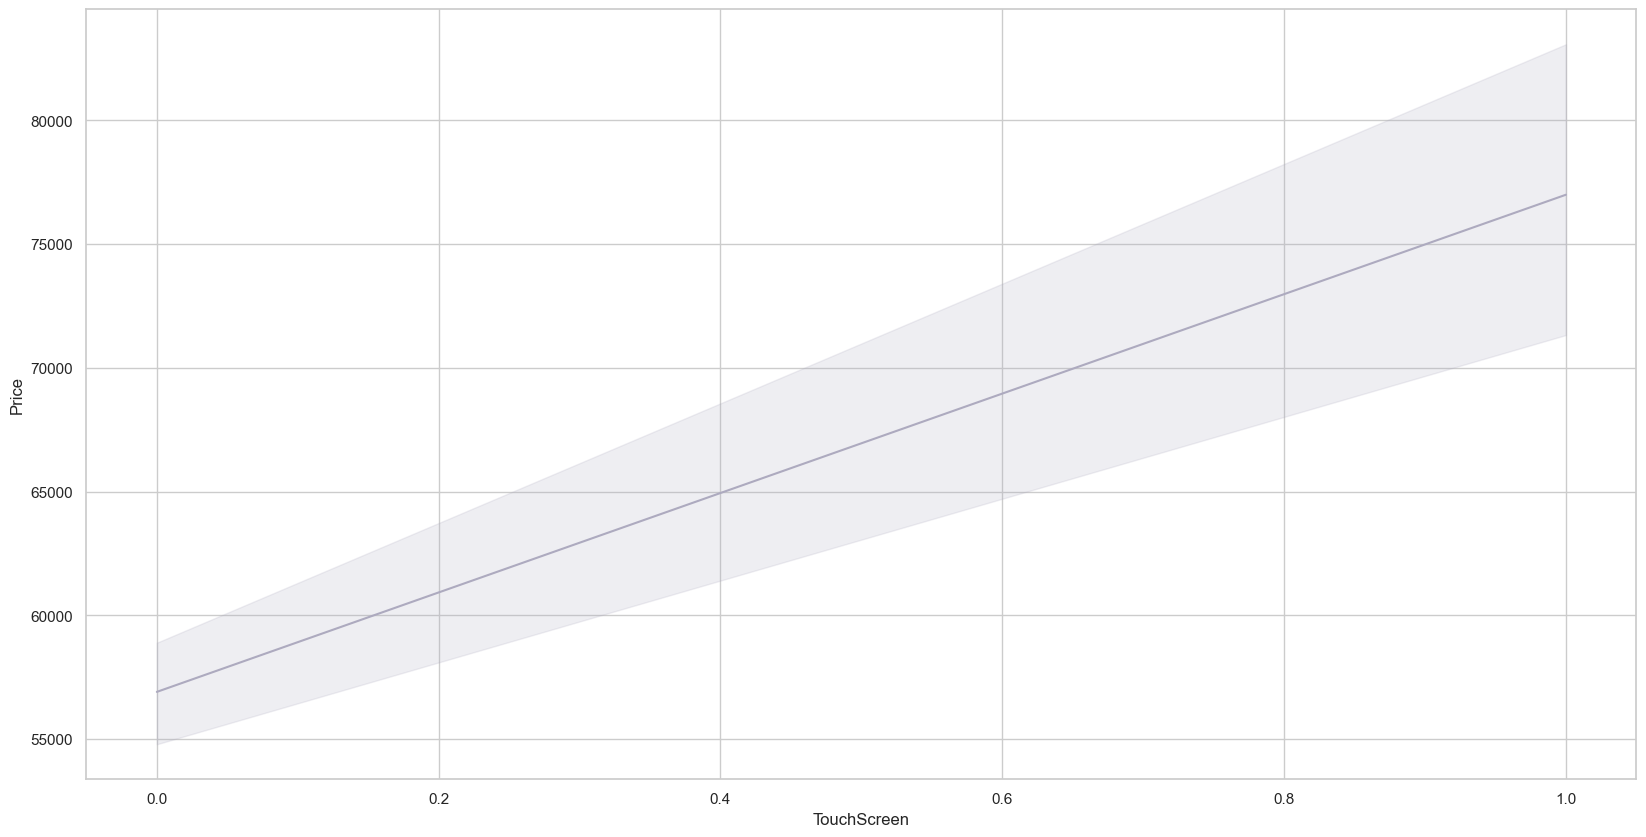

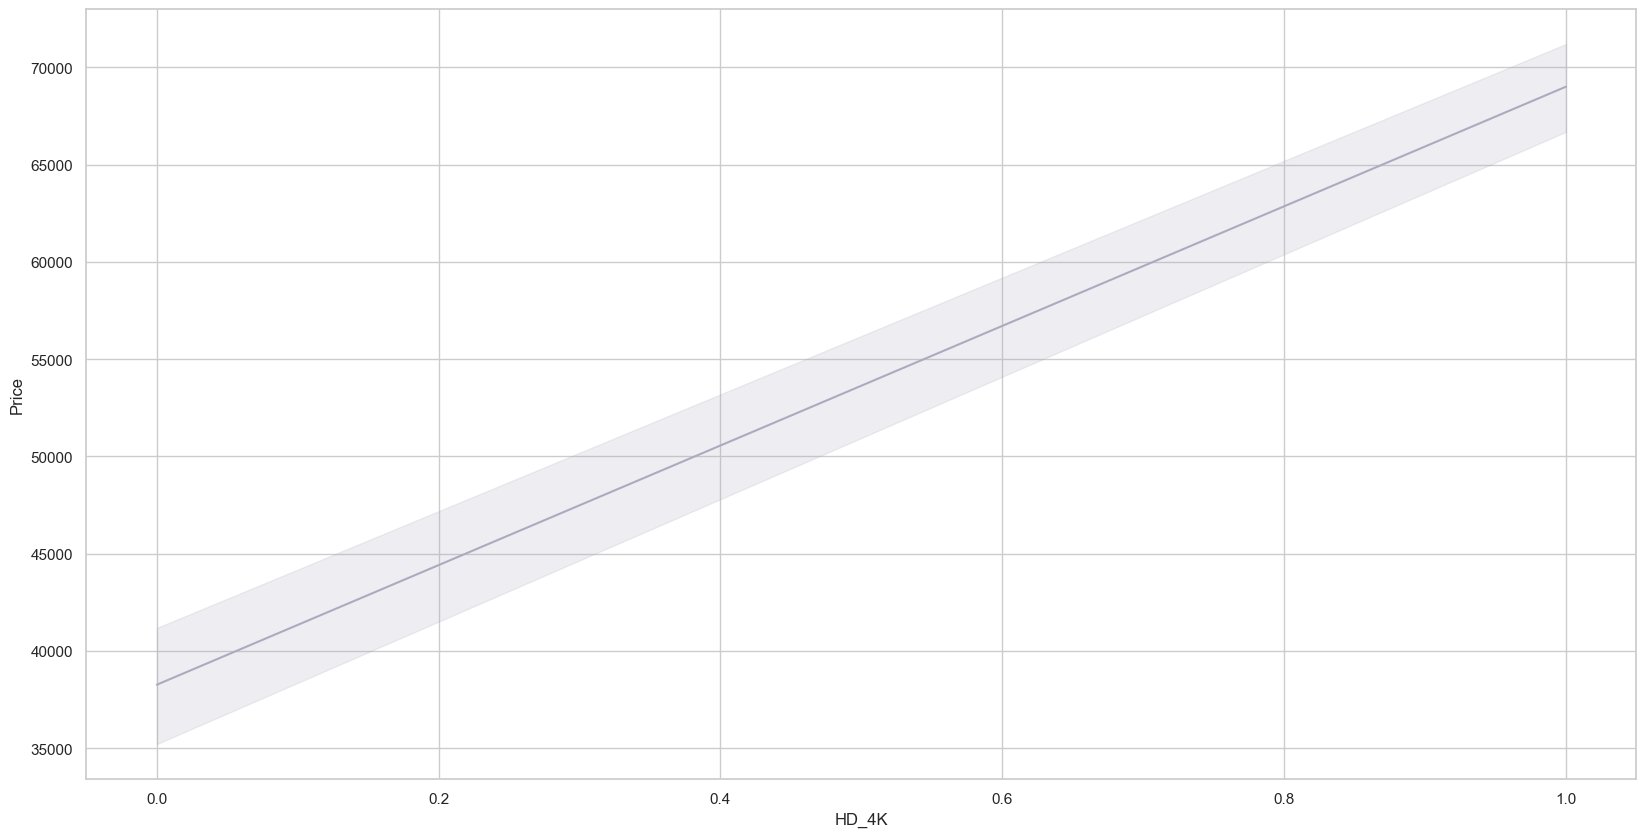

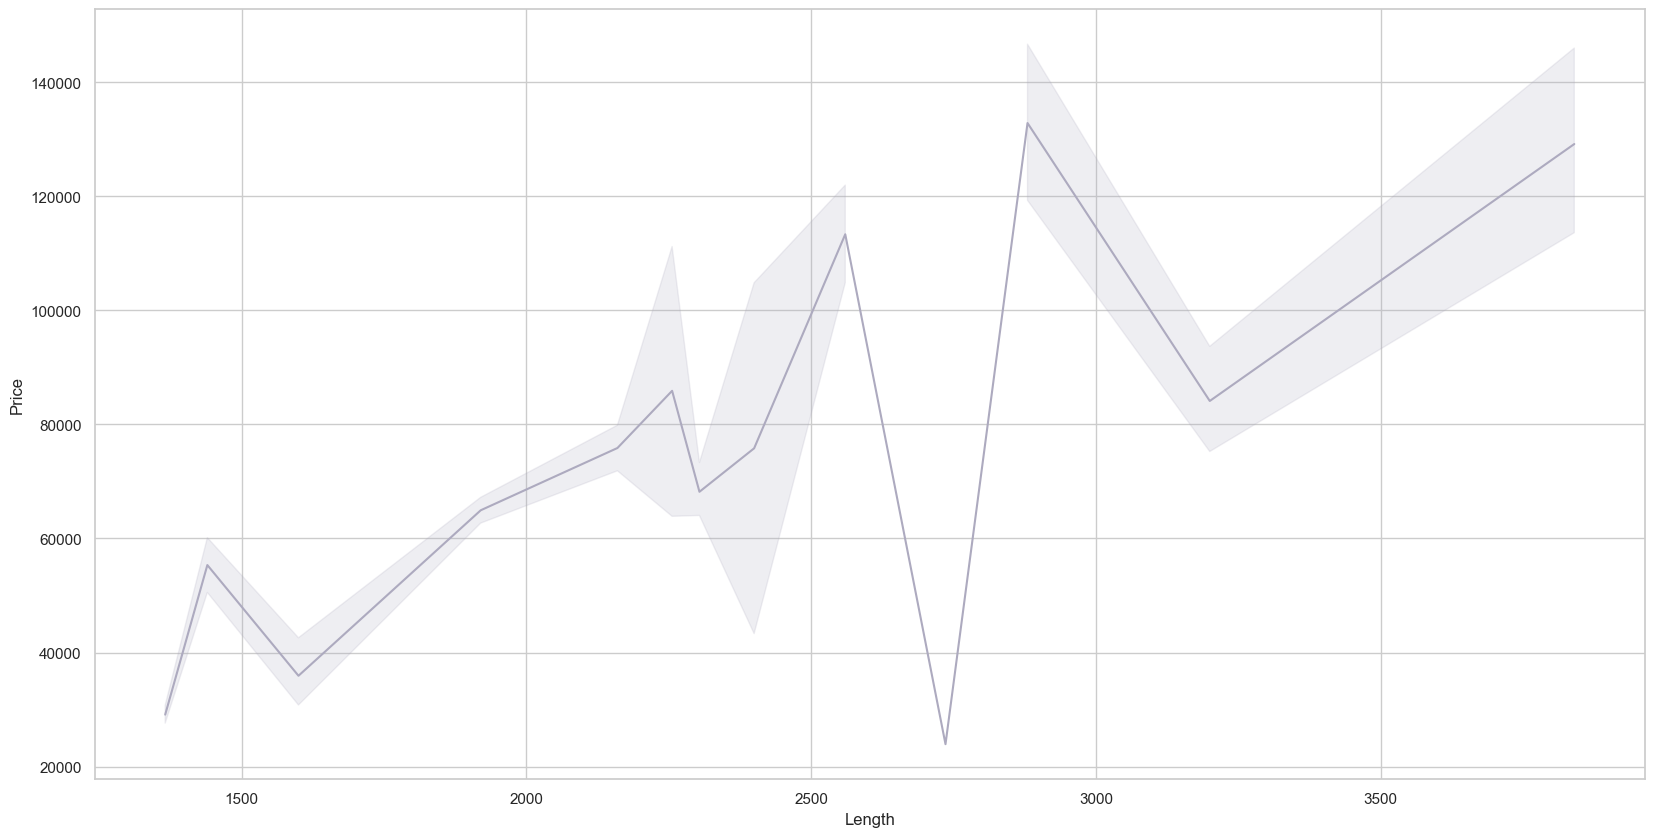

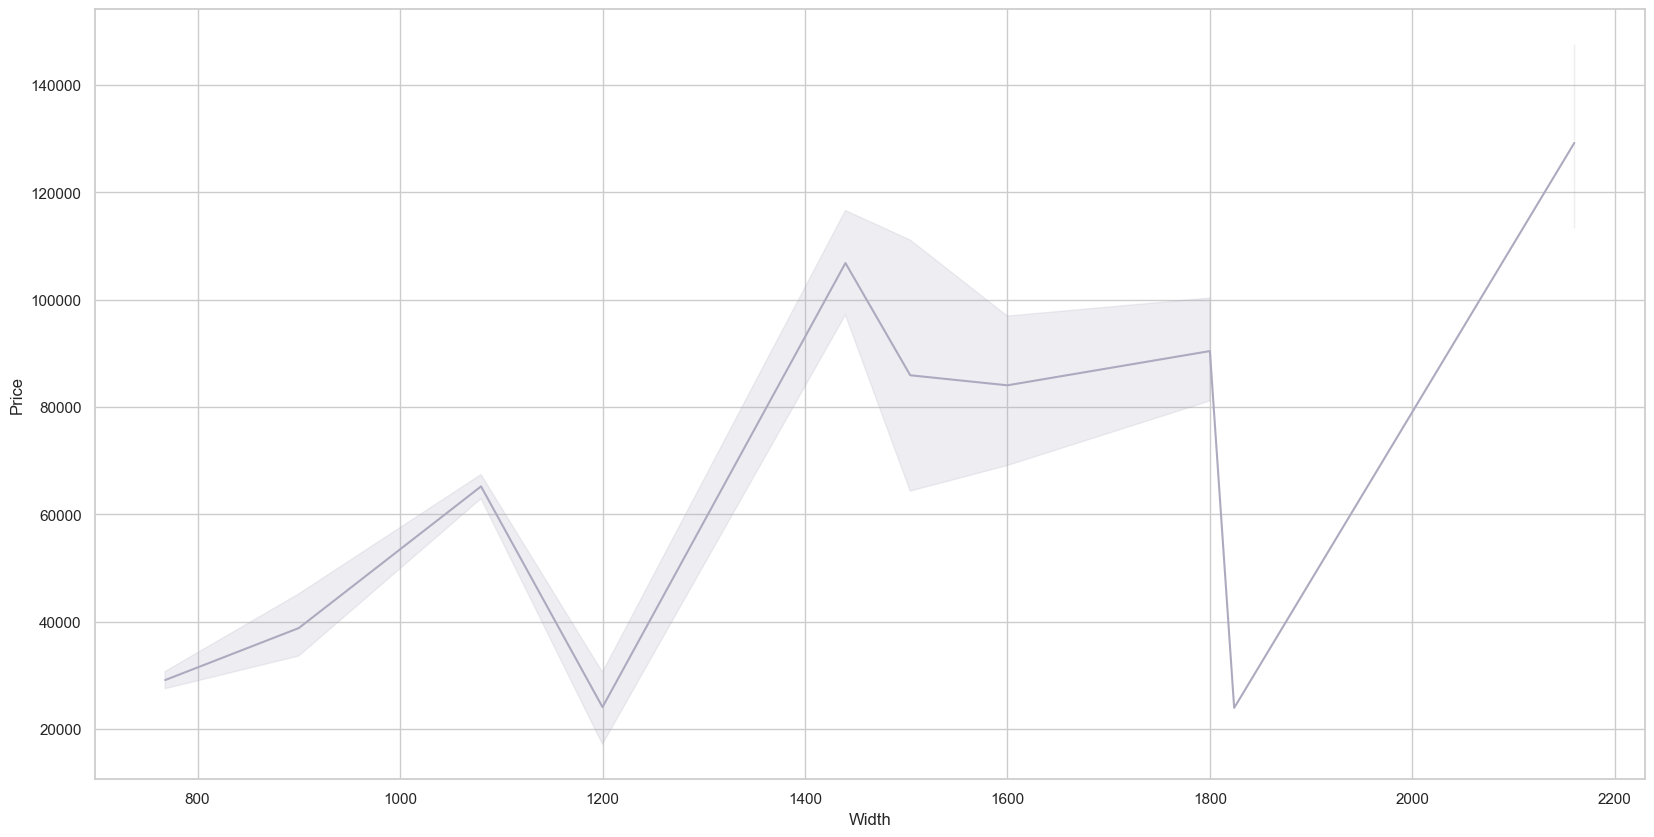

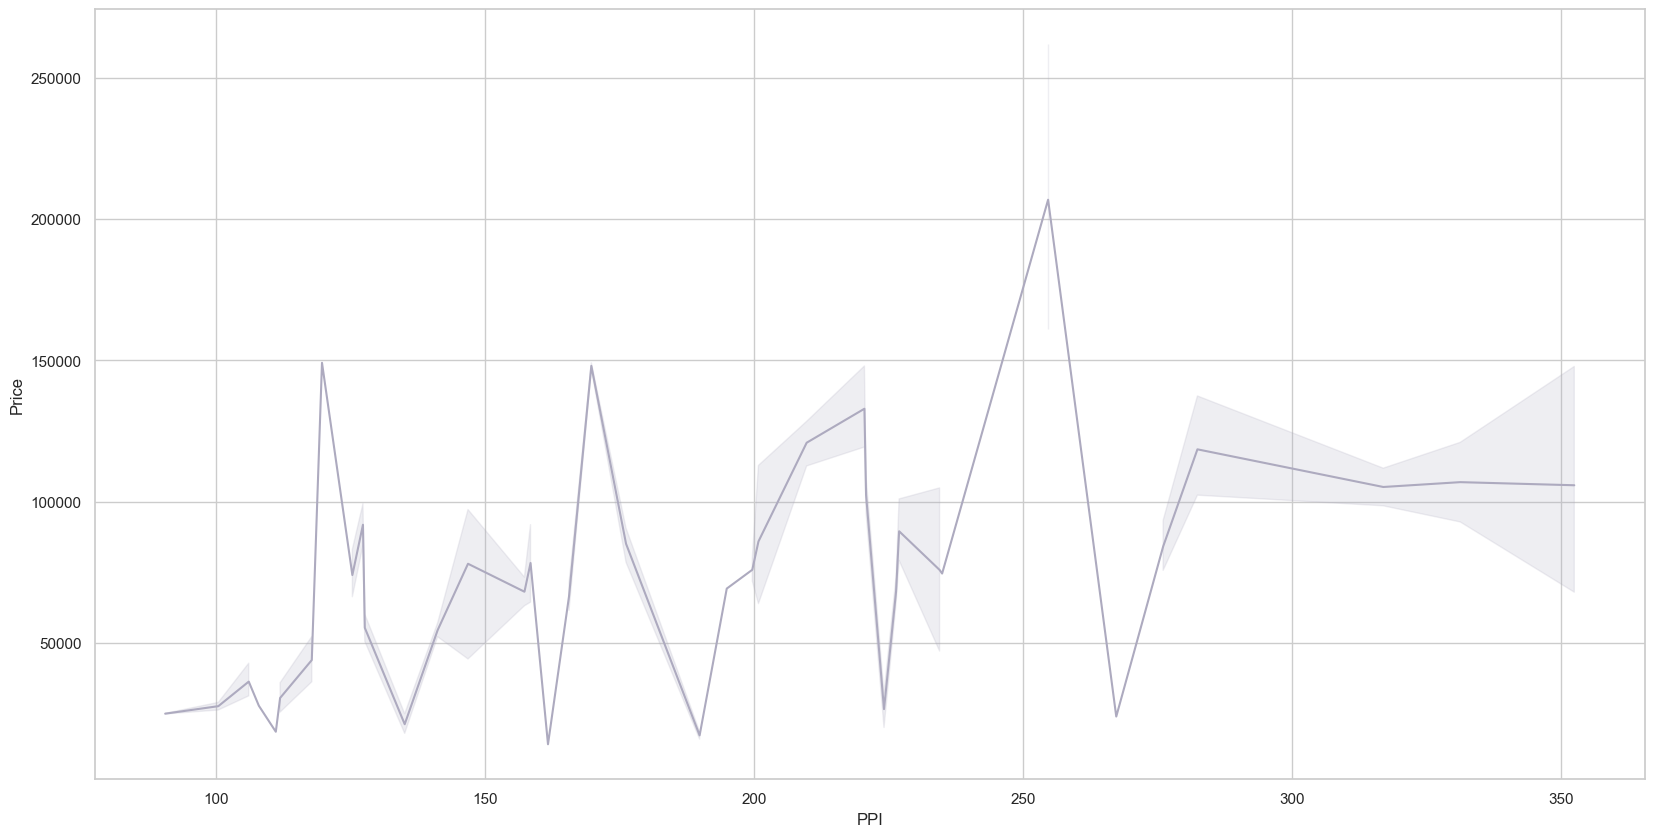

In [9]:
sns.set ( style = "whitegrid" )
for i in DF.drop ( columns = [ 'Price' , 'Weight' , 'CPU_Types' , 'Memory_Types' ]  ) :    
    plt.figure ( figsize = ( 20 , 10 ) )    
    sns.lineplot ( x = DF [ i ].sort_values ( ) , y = DF.Price , color = '#ADAABF' , markers = '*'  )    
    plt.show()

### OS DISTRIBUTION

<Axes: xlabel='OpSys', ylabel='Inches'>

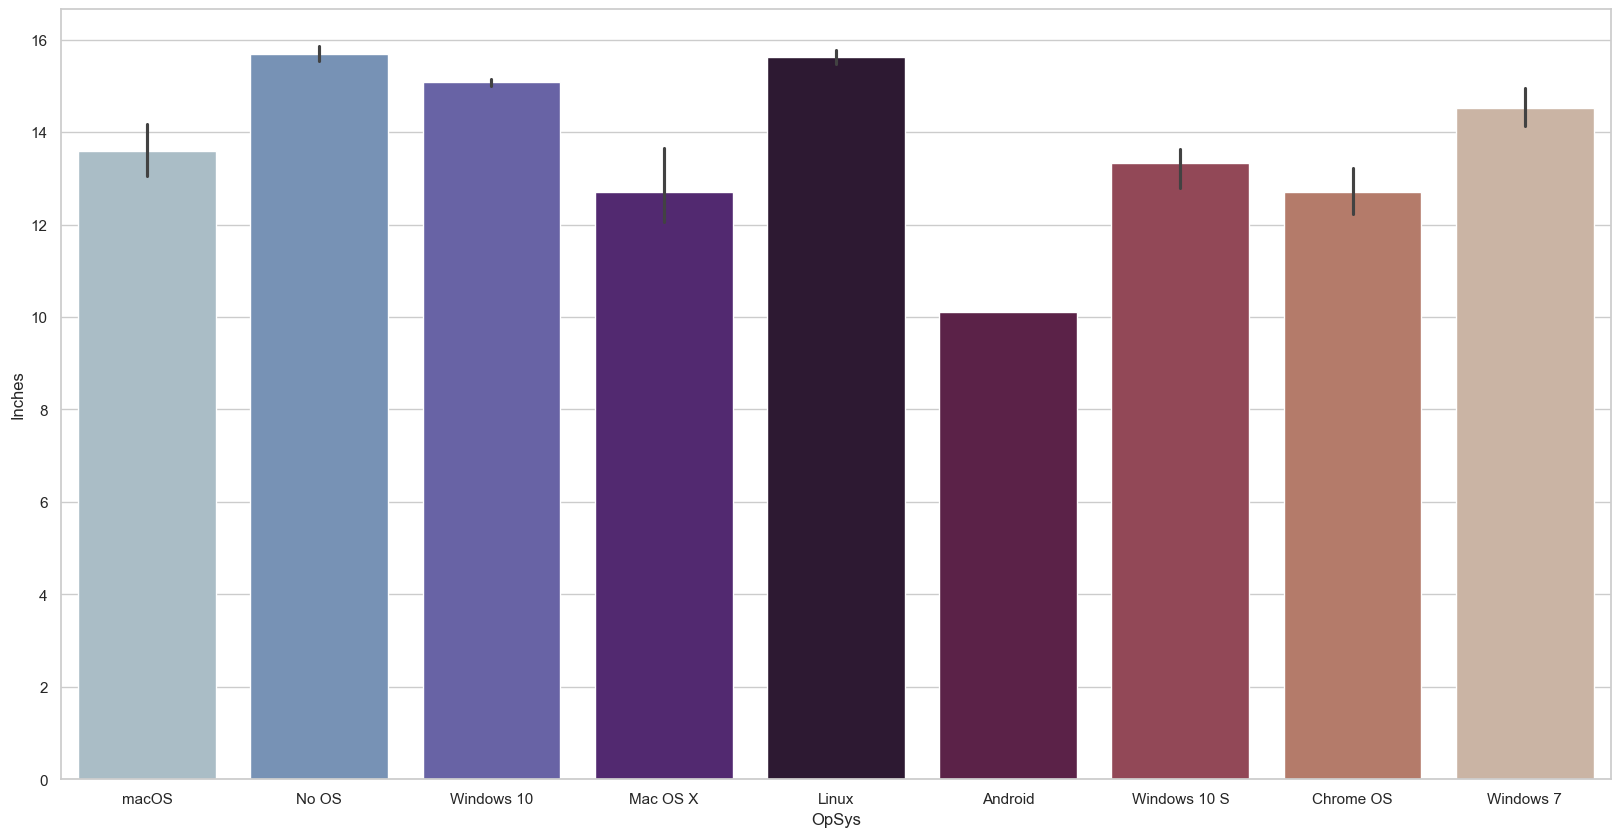

In [13]:
sns.set ( style = "whitegrid" )
plt.figure ( figsize = ( 20 , 10 ) )
sns.barplot ( y = DF.Inches , x = DF[ 'OpSys' ] , palette = 'twilight' )

### Price Distribution

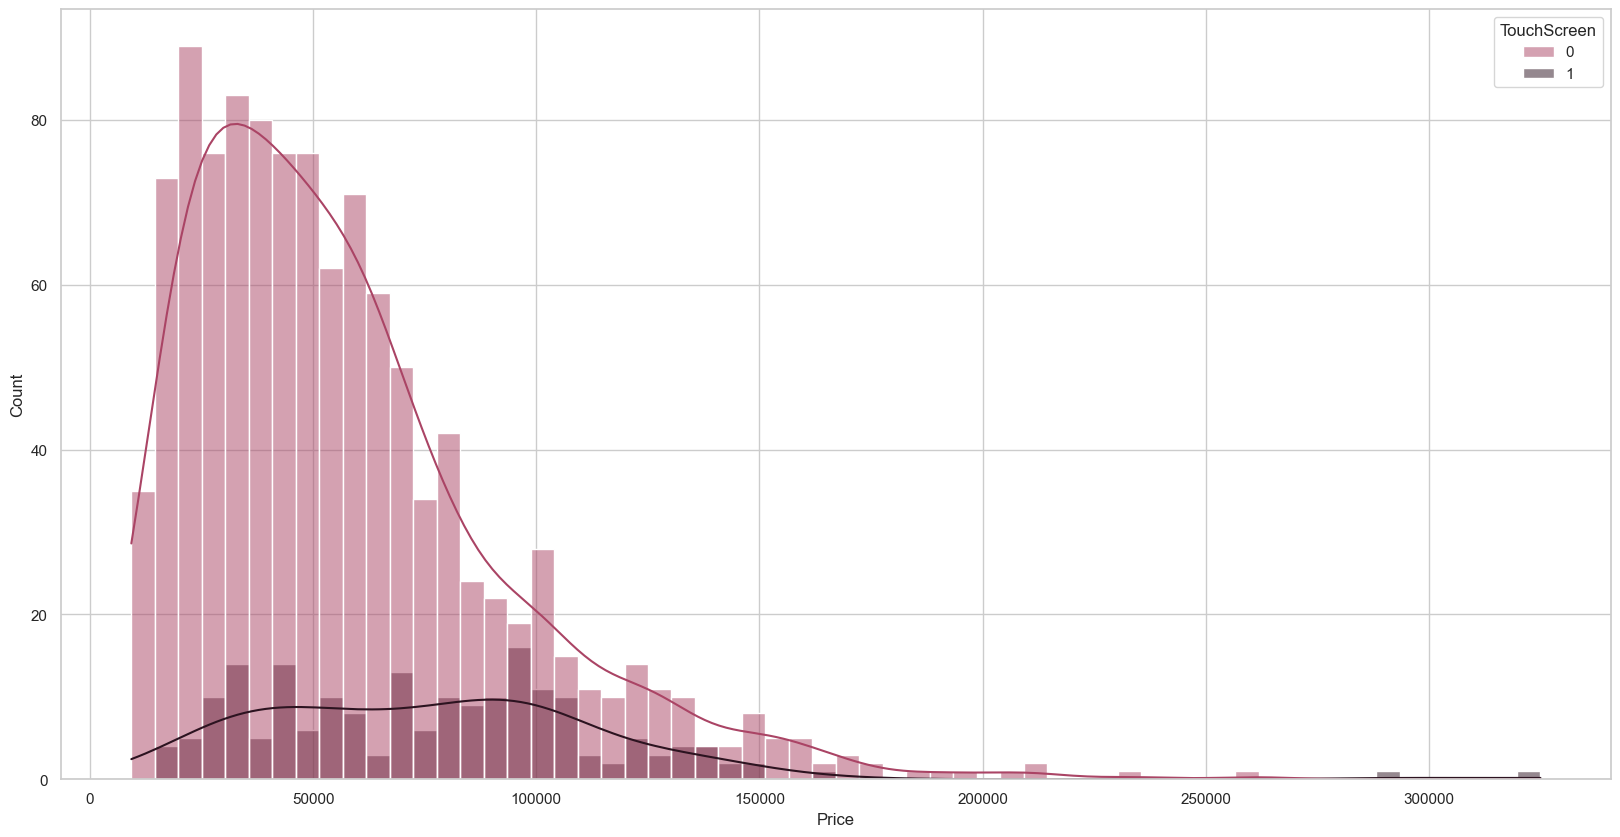

In [12]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( data = DF_Original , x = DF_Original.Price , kde = True , hue = 'TouchScreen' , palette = [ '#AA4465', '#2C1320' ] , bins = 60 );

### Ram Distribution

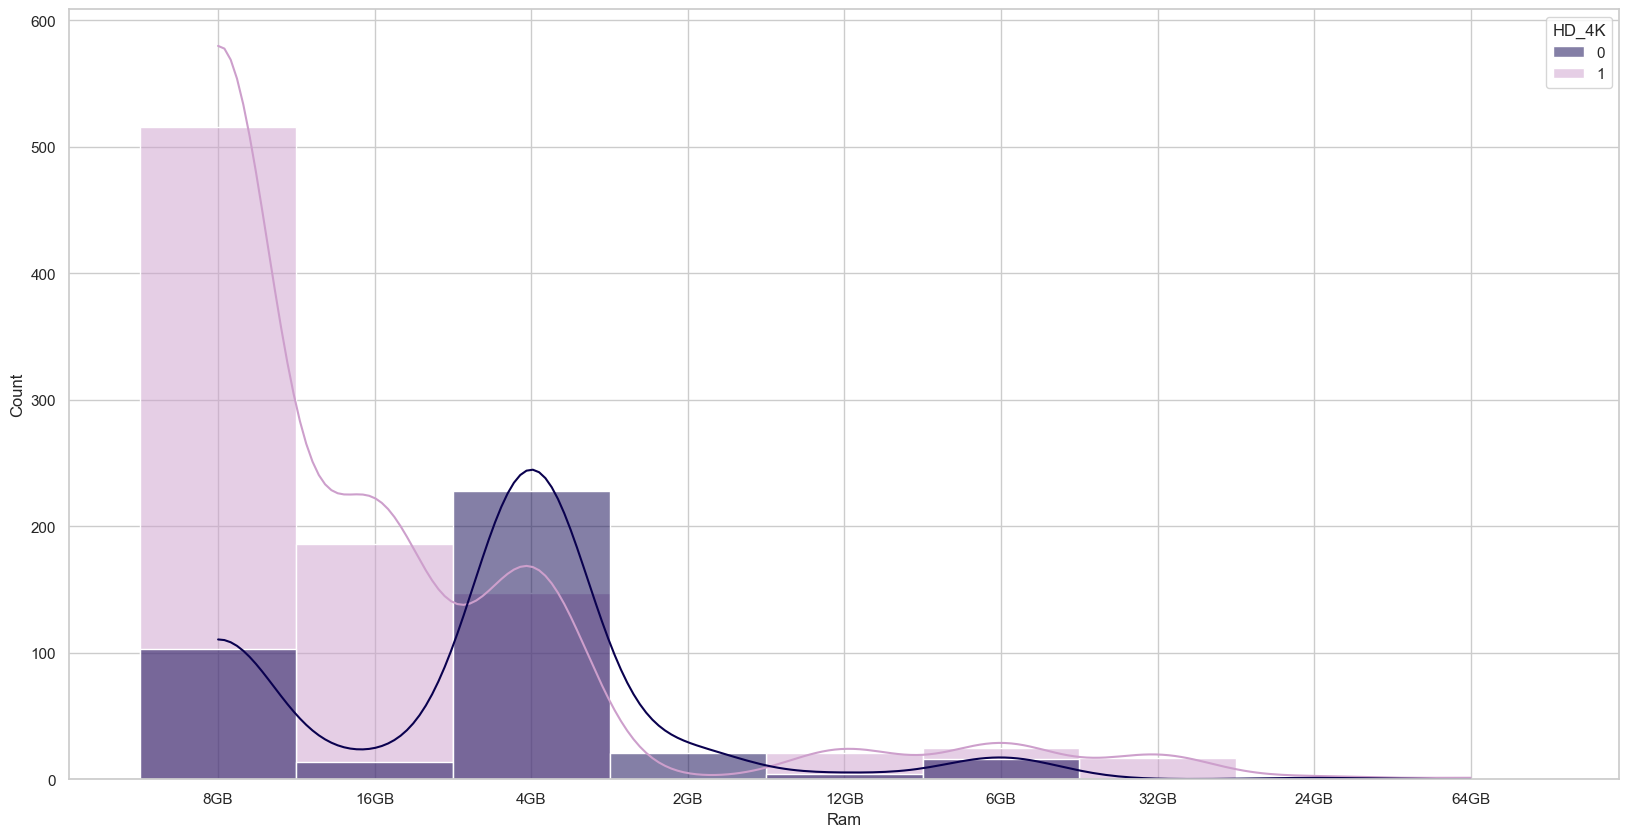

In [15]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( data = DF_Original , x = DF_Original.Ram , kde = True , hue =  'HD_4K' , palette = [ '#0A014F', '#CD9FCC' ] );

### Screen Feature

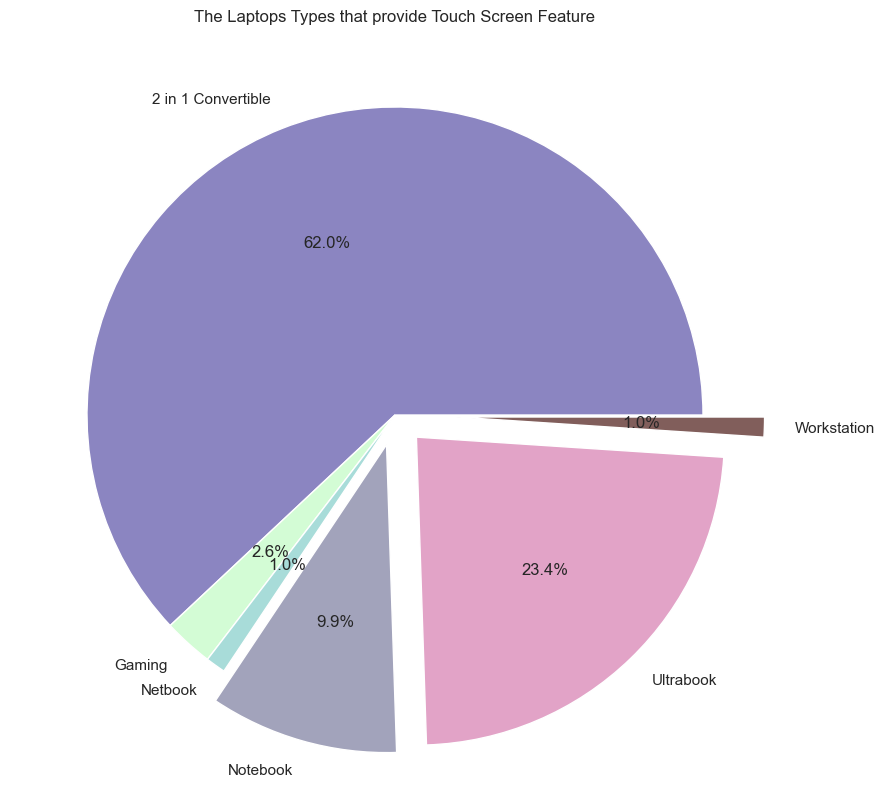

In [16]:
Data = DF.groupby ( by = ['TypeName']  ).sum ( ).reset_index ( ).loc [ : , ['TouchScreen', 'TypeName'] ]
#
Colors = [ '#8B85C1' , '#D3FCD5' , '#A8DCD9' , '#A2A3BB' , '#E2A3C7'  , '#815E5B' ,  '#7A6F9B' ]
plt.figure ( figsize = ( 20 , 10 ) )
plt.pie ( x = Data.TouchScreen , autopct = '%1.1f%%', colors = Colors , explode = [ 0 , 0 , 0 , 0.1 , 0.1 , 0.2 ] , labels = list(Data.TypeName.unique ( ))) ;
plt.title ( "The Laptops Types that provide Touch Screen Feature" );

### CPU Type

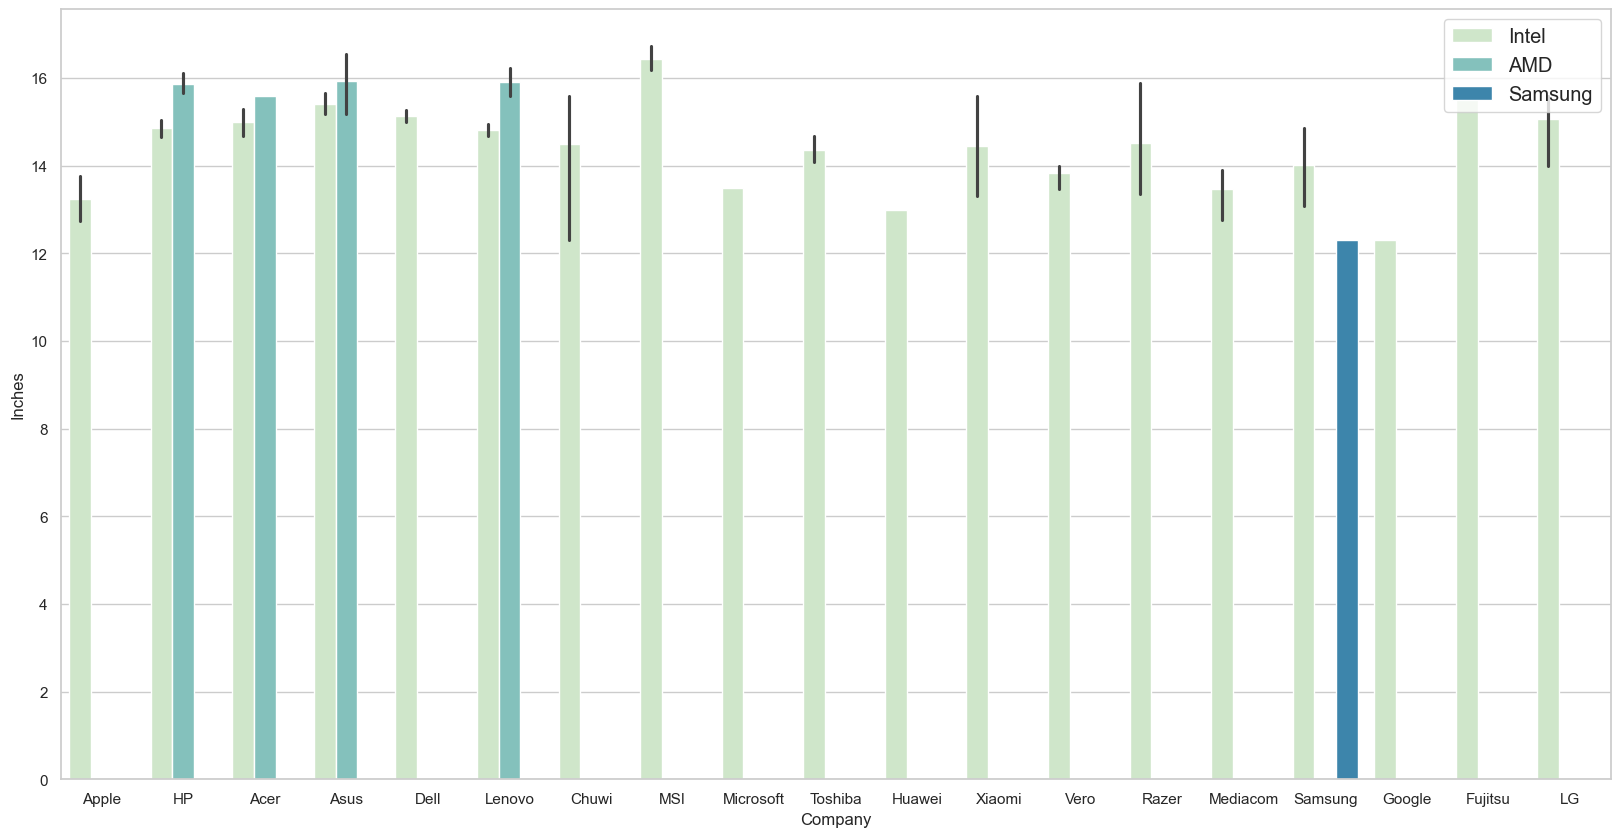

In [17]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.barplot ( x = 'Company' , y = 'Inches' , hue = 'CPU_Types' , data = DF_Original , palette = 'GnBu' )
plt.legend ( loc = 'upper right' , fontsize = 'large' )
plt.show ( )

### Outliers

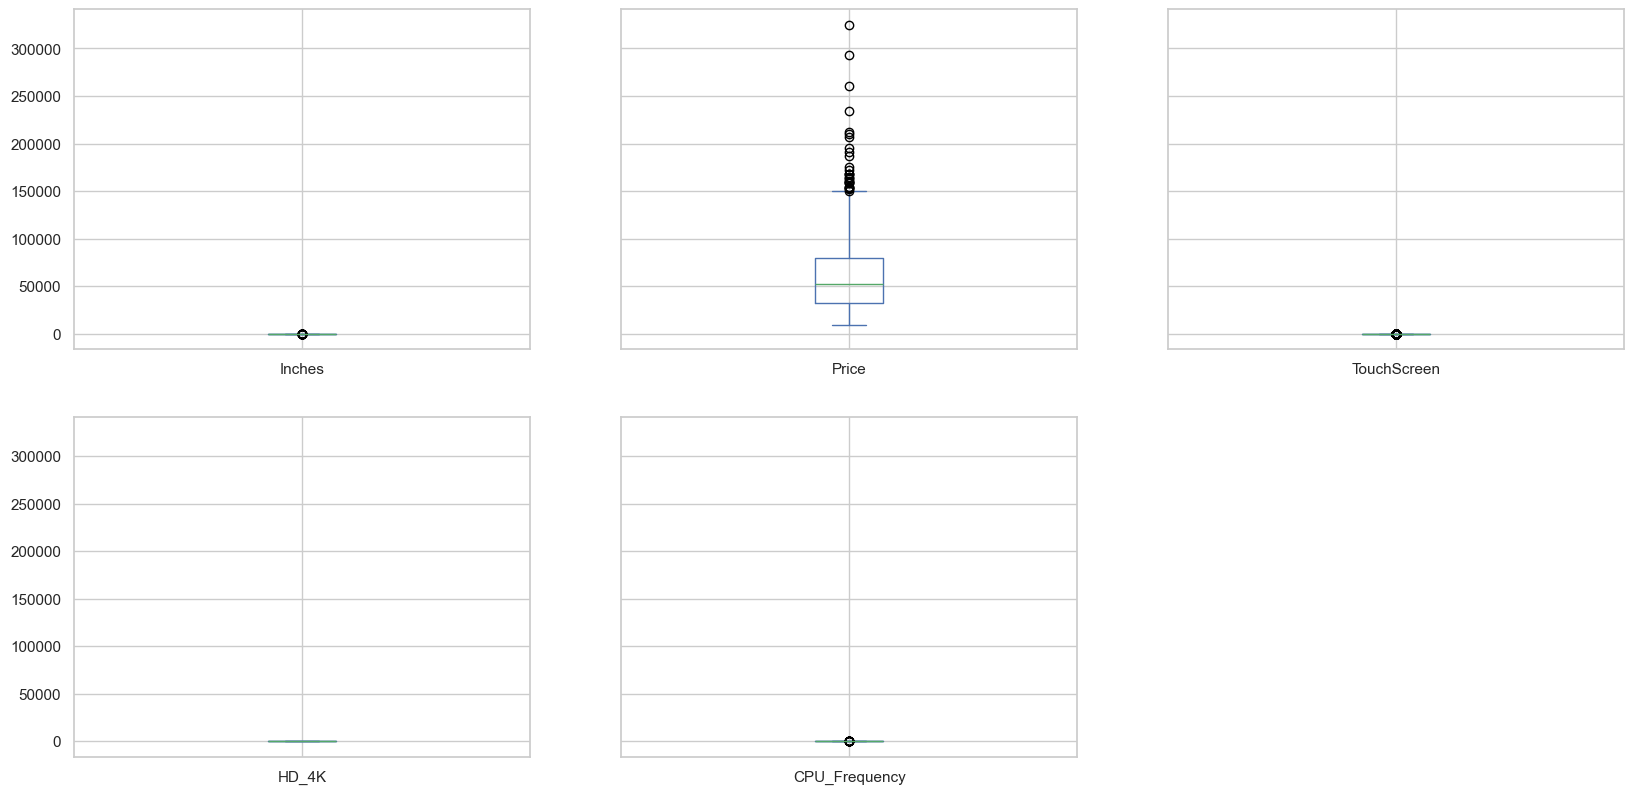

In [18]:
DF_Original.select_dtypes ( np.number ).plot ( kind = 'box' , subplots = True , layout = ( 3 , 3 ) , figsize = ( 20 , 15 ) , sharex = True , sharey = True );

In [19]:
Mean = DF.Price.mean ( )

Std_Dev = DF.Price.std ( )

Threshold = 3

Lower_Limit = Mean - Threshold * Std_Dev

Upper_Limit = Mean + Threshold * Std_Dev

DF [ 'Price' ] = DF [ 'Price' ].apply ( lambda x : Lower_Limit if x < Lower_Limit else ( Upper_Limit if x > Upper_Limit else x ) )

In [20]:
DF['Price']  = pd.DataFrame ( np.log1p ( DF [ [ 'Price' ] ] ) )
DF.Ram = DF.Ram.str.replace ( 'GB' , '' ).astype ( 'int64' )
DF.Weight = DF.Weight.str.replace ( 'kg' , '' ).astype ( 'float64' )

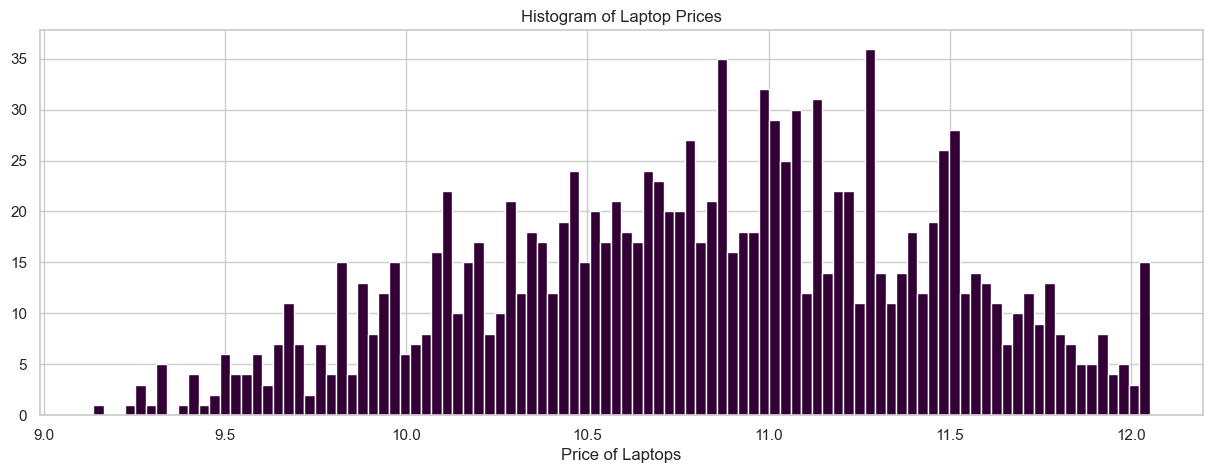

In [21]:
plt.figure ( figsize = ( 15 , 5 ) )
DF.Price.hist ( bins = 100 , color = '#330036' );
plt.xlabel ( "Price of Laptops" )
plt.title ( "Histogram of Laptop Prices" );